In [1]:
import pandas as pd
import numpy as np
import random
import os

# Seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

# Load the dataset
# Assuming the notebook is in 'notebooks/' and data is in 'data/' sibling directory
data_path = "../data/data_set.csv"
df = pd.read_csv(data_path)

# --- 3.1 Load & Inspect ---
print("--- Initial Data Inspection ---")
df.info()
print(f"\nDataset shape: {df.shape}")

# Check for 'congenital_syphilis' target column or 'VDRL_RESULT'
target_col_name = "congenital_syphilis"
potential_target_col = "VDRL_RESULT" # From data_set.csv header and attributes.csv

if target_col_name in df.columns:
    print(f"\nTarget column '{target_col_name}' found.")
elif potential_target_col in df.columns:
    print(f"\nPotential target column '{potential_target_col}' found. Renaming to '{target_col_name}'.")
    df.rename(columns={potential_target_col: target_col_name}, inplace=True)
else:
    # This case should ideally not be reached if data matches expectations
    raise ValueError(f"Target column '{target_col_name}' or potential target '{potential_target_col}' not found in dataset. Please check column names.")

print(f"\nValue counts for target variable '{target_col_name}':")
print(df[target_col_name].value_counts(dropna=False))

# Assertions from roadmap (Section 3.1)
# 1. Assert 41,762 rows
expected_rows = 41762
assert df.shape[0] == expected_rows, f"Assertion failed: Expected {expected_rows} rows, got {df.shape[0]}"
print(f"\nAssertion passed: Dataset has {df.shape[0]} rows.")

# 2. Assert 26 predictors, target column 'congenital_syphilis' (binary 0/1)
# If target is one of the loaded columns, then predictors = total_columns - 1
num_predictors = df.shape[1] - 1
expected_predictors_roadmap = 26 

print(f"Number of predictors found: {num_predictors}")
if num_predictors == expected_predictors_roadmap:
    print(f"Assertion passed: Dataset has {num_predictors} predictors as per roadmap.")
else:
    print(f"Note: Found {num_predictors} predictors. Roadmap specified {expected_predictors_roadmap}.")
    print(f"This means the original dataset had {df.shape[1]} columns, one of which is now the target.")

assert target_col_name in df.columns, f"Assertion failed: Target column '{target_col_name}' not found after processing."
print(f"Assertion passed: Target column '{target_col_name}' is present.")

# Check if target is binary 0/1 (or 0.0/1.0 which pandas might infer for float columns)
target_values = df[target_col_name].dropna().unique()
# Convert to int if they are float representations of int (e.g. 0.0, 1.0)
# Check if all values can be safely converted to int and are indeed 0 or 1
is_binary = True
cleaned_target_values = set()
for val in target_values:
    if pd.isna(val): continue
    try:
        int_val = int(val)
        if int_val == val and int_val in [0, 1]: # Check if it was an integer and is 0 or 1
            cleaned_target_values.add(int_val)
        else:
            is_binary = False
            break
    except ValueError:
        is_binary = False
        break

assert is_binary, f"Assertion failed: Target column '{target_col_name}' is not binary (0/1). Found unique non-NA values: {target_values}"
print(f"Assertion passed: Target column '{target_col_name}' is binary (0/1). Unique values found: {cleaned_target_values}")

print("\n--- Section 3.1 Load & Inspect: Completed ---")

# Display first few rows to verify
df.head()

--- Initial Data Inspection ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  flo

,congenital_syphilis,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


#CELULA 2


--- Section 3.2: Exploratory Data Analysis ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   congenital_syphilis  41762 non-null  float64
 1   CONS_ALCOHOL         41762 non-null  float64
 2   RH_FACTOR            41762 non-null  float64
 3   SMOKER               41762 non-null  float64
 4   PLAN_PREGNANCY       41762 non-null  float64
 5   BLOOD_GROUP          41762 non-null  float64
 6   HAS_PREG_RISK        41762 non-null  float64
 7   TET_VACCINE          41762 non-null  float64
 8   IS_HEAD_FAMILY       41762 non-null  float64
 9   MARITAL_STATUS       41762 non-null  float64
 10  FOOD_INSECURITY      41762 non-null  float64
 11  NUM_ABORTIONS        41762 non-null  float64
 12  NUM_LIV_CHILDREN     41762 non-null  float64
 13  NUM_PREGNANCIES      41762 non-null  float64
 14  FAM_PLANNING         

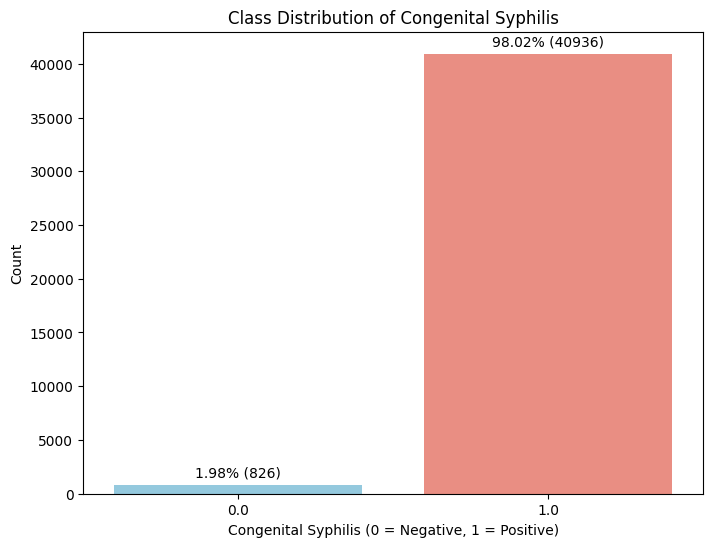

In [2]:
# --- 3.2 Exploratory Data Analysis ---
import matplotlib.pyplot as plt
import seaborn as sns
import os # Ensure os is imported if not already in the cell

print("\n--- Section 3.2: Exploratory Data Analysis ---")

# Display DataFrame info again to see dtypes
print("\nDataFrame Info:")
df.info()

# Identify numeric and categorical columns
# 'AGE' and columns prefixed with 'NUM_' are treated as numeric.
# All other columns (excluding the target 'congenital_syphilis') are treated as categorical.

# Numeric columns (excluding target)
num_cols = ['AGE', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'NUM_RES_HOUSEHOLD']

# Categorical columns (all others excluding target and identified numeric)
all_cols = df.columns.tolist()
target_col_name = 'congenital_syphilis' # Defined in the previous cell
cat_cols = [col for col in all_cols if col not in num_cols + [target_col_name]]

print(f"\nIdentified Numeric Columns: {num_cols}")
print(f"Identified Categorical Columns: {cat_cols}")

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
# Ensure all num_cols exist in df to avoid KeyErrors
existing_num_cols = [col for col in num_cols if col in df.columns]
if existing_num_cols:
    print(df[existing_num_cols].describe())
else:
    print("No numeric columns found or specified numeric columns do not exist.")

# Value counts for categorical columns
print("\nValue counts for categorical columns:")
# Ensure all cat_cols exist in df
existing_cat_cols = [col for col in cat_cols if col in df.columns]
if existing_cat_cols:
    for col in existing_cat_cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts(dropna=False).sort_index()) # sort_index for consistent order
else:
    print("No categorical columns found or specified categorical columns do not exist.")

# Visualize class distribution for the target variable
print(f"\nVisualizing class distribution for '{target_col_name}'...")
plt.figure(figsize=(8, 6))

# Corrected palette keys to float and addressed FutureWarning
sns.countplot(
    x=target_col_name,
    data=df,
    hue=target_col_name, # Address FutureWarning
    palette={0.0: "skyblue", 1.0: "salmon"}, # Use float keys
    legend=False # Address FutureWarning
)
plt.title('Class Distribution of Congenital Syphilis')
plt.xlabel('Congenital Syphilis (0 = Negative, 1 = Positive)')
plt.ylabel('Count')

# Calculate and display percentages on the plot
total_samples = len(df)
# Ensure class_counts are indexed by the actual values in the column (floats)
class_counts = df[target_col_name].value_counts().sort_index()

y_offset_factor = 0.01 * total_samples

for bar_value, count_val in class_counts.items(): # Iterate through items (value, count)
    percentage = 100 * count_val / total_samples
    plt.text(bar_value, count_val + y_offset_factor, f'{percentage:.2f}% ({count_val})', ha='center', va='bottom')

# Ensure reports/figures directory exists (path relative to notebook location)
reports_figures_path = "../reports/figures/"
os.makedirs(reports_figures_path, exist_ok=True)

plot_filename = "class_distribution.png"
plot_full_path = os.path.join(reports_figures_path, plot_filename)

plt.savefig(plot_full_path)
print(f"\nClass distribution plot saved to: {plot_full_path}")
plt.show() # Display the plot in the notebook


--- Correcting Target Variable Encoding ---
Original target value counts:
congenital_syphilis
1.0    98.022125
0.0     1.977875
Name: proportion, dtype: float64

Corrected target value counts (0=Negative, 1=Positive):
congenital_syphilis
0    98.022125
1     1.977875
Name: proportion, dtype: float64
congenital_syphilis
0    40936
1      826
Name: count, dtype: int64

Re-visualizing class distribution for 'congenital_syphilis' after correction...

Corrected class distribution plot saved to: ../reports/figures/class_distribution_corrected.png


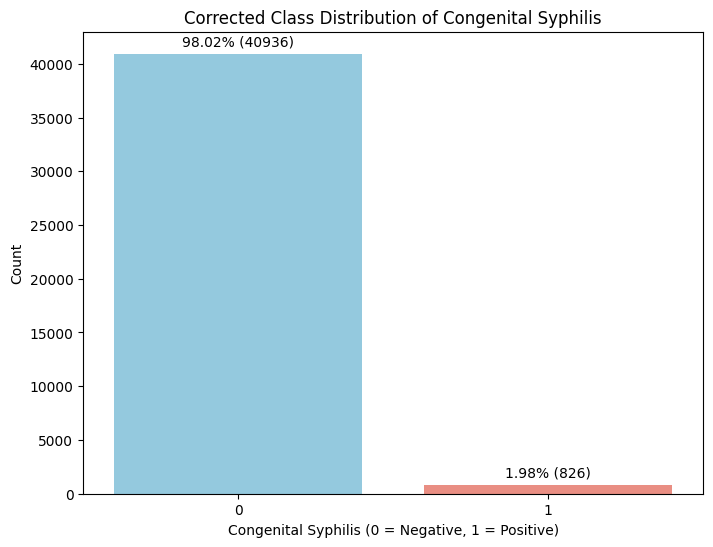


--- Target Variable Correction: Completed ---


,congenital_syphilis,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


In [3]:
# --- Target Variable Correction (Post-EDA Observation) ---
print("\n--- Correcting Target Variable Encoding ---")

# Current distribution (as observed by user from plot)
# congenital_syphilis = 1.0 is ~98%
# congenital_syphilis = 0.0 is ~2%
# Roadmap expects ~2% POSITIVES.
# This implies current 0.0 should be the positive class (1), and 1.0 should be negative (0).

print("Original target value counts:")
print(df['congenital_syphilis'].value_counts(normalize=True) * 100)

# Re-map: 0.0 -> 1 (Positive), 1.0 -> 0 (Negative)
# Make sure to handle potential float precision if necessary, but direct mapping should work for 0.0 and 1.0
df['congenital_syphilis'] = df['congenital_syphilis'].map({0.0: 1, 1.0: 0})

print("\nCorrected target value counts (0=Negative, 1=Positive):")
print(df['congenital_syphilis'].value_counts(normalize=True) * 100)
print(df['congenital_syphilis'].value_counts()) # Also show absolute counts

# --- Re-visualize Class Distribution after Correction ---
target_col_name = 'congenital_syphilis' # Should be the same

print(f"\nRe-visualizing class distribution for '{target_col_name}' after correction...")
plt.figure(figsize=(8, 6))

# Palette keys should now be integers 0 and 1
sns.countplot(
    x=target_col_name,
    data=df,
    hue=target_col_name,
    palette={0: "skyblue", 1: "salmon"}, # Integer keys
    legend=False
)
plt.title('Corrected Class Distribution of Congenital Syphilis')
plt.xlabel('Congenital Syphilis (0 = Negative, 1 = Positive)')
plt.ylabel('Count')

total_samples = len(df)
class_counts = df[target_col_name].value_counts().sort_index()

y_offset_factor = 0.01 * total_samples

for bar_value, count_val in class_counts.items():
    percentage = 100 * count_val / total_samples
    plt.text(bar_value, count_val + y_offset_factor, f'{percentage:.2f}% ({count_val})', ha='center', va='bottom')

# Save the corrected plot
corrected_plot_filename = "class_distribution_corrected.png"
corrected_plot_full_path = os.path.join(reports_figures_path, corrected_plot_filename) # reports_figures_path defined in previous cell

plt.savefig(corrected_plot_full_path)
print(f"\nCorrected class distribution plot saved to: {corrected_plot_full_path}")
plt.show()

print("\n--- Target Variable Correction: Completed ---")
df.head()

#3.3

In [4]:
# --- 3.3 Data Cleaning ---
print("\n--- Section 3.3: Data Cleaning ---")

# Make a copy of the DataFrame to work on cleaning, preserving the original df if needed for comparison
df_cleaned = df.copy()

# Define numeric and categorical columns based on EDA
# These lists should be identical to what was printed in the EDA cell
num_cols = ['AGE', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'NUM_RES_HOUSEHOLD']
cat_cols = ['CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'BLOOD_GROUP', 
            'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS', 
            'FOOD_INSECURITY', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME', 
            'LEVEL_SCHOOLING', 'CONN_SEWER_NET', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 
            'FAM_INCOME', 'HOUSING_STATUS', 'WATER_TREATMENT']

# 1. Drop duplicates
print(f"\nShape before dropping duplicates: {df_cleaned.shape}")
df_cleaned.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {df_cleaned.shape}")

# 2. Handle impossible ages (<10 or >60)
print("\nHandling impossible AGE values...")
# Create 'IS_AGE_IMPUTED' flag column
df_cleaned['IS_AGE_IMPUTED'] = 0
# Identify invalid age entries
invalid_age_condition = (df_cleaned['AGE'] < 10) | (df_cleaned['AGE'] > 60)
df_cleaned.loc[invalid_age_condition, 'IS_AGE_IMPUTED'] = 1

print(f"Number of records with invalid AGE (to be imputed): {df_cleaned['IS_AGE_IMPUTED'].sum()}")
print("Original AGE statistics before imputation:")
print(df_cleaned['AGE'].describe())

# Calculate median of valid ages (10-60)
valid_ages = df_cleaned.loc[(df_cleaned['AGE'] >= 10) & (df_cleaned['AGE'] <= 60), 'AGE']
median_valid_age = valid_ages.median()
print(f"Median of valid AGEs (10-60 years): {median_valid_age}")

# Impute invalid ages with the median of valid ages
df_cleaned.loc[invalid_age_condition, 'AGE'] = median_valid_age
print("AGE statistics after imputation:")
print(df_cleaned['AGE'].describe())

# 3. Impute missing numeric values with the median
# This will apply to AGE if invalid values were set to NaN, or any other num_col if it has NaNs.
print("\nImputing missing values in numeric columns with median...")
for col in num_cols:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"Imputed NaNs in '{col}' with median: {median_val}")
    else:
        print(f"No NaNs found in numeric column '{col}'. No imputation needed.")

# 4. Impute missing categorical values by adding an "unknown" category
# Current categorical columns are float64. If they had NaNs, we'd fill with a placeholder (e.g., -1 or a new code).
# The roadmap mentions "Not informed" treated as "unknown". These are already distinct numeric codes.
# This step will only act if true NaNs are present.
print("\nImputing missing values in categorical columns...")
for col in cat_cols:
    if df_cleaned[col].isnull().any():
        # Using -1 as a placeholder for 'unknown' as columns are numeric/float
        # This new category will be handled by OneHotEncoding later
        unknown_placeholder = -1.0 
        df_cleaned[col].fillna(unknown_placeholder, inplace=True)
        print(f"Imputed NaNs in '{col}' with placeholder: {unknown_placeholder}")
    else:
        print(f"No NaNs found in categorical column '{col}'. No imputation needed.")

# Display info and head of the cleaned DataFrame
print("\n--- DataFrame Info After Cleaning ---")
df_cleaned.info()

print("\n--- Cleaned DataFrame Head ---")
print(df_cleaned.head())

# Verify IS_AGE_IMPUTED flag
print("\nValue counts for 'IS_AGE_IMPUTED':")
print(df_cleaned['IS_AGE_IMPUTED'].value_counts())

print("\n--- Section 3.3 Data Cleaning: Completed ---")

# Store the cleaned column lists for use in preprocessing.py
# (These are the same as input, but good to confirm after cleaning)
final_num_cols = num_cols 
final_cat_cols = cat_cols + ['IS_AGE_IMPUTED'] # Add the new flag to categorical features

print(f"\nFinal Numeric Columns: {final_num_cols}")
print(f"Final Categorical Columns (including new flags): {final_cat_cols}")


--- Section 3.3: Data Cleaning ---

Shape before dropping duplicates: (41762, 26)
Shape after dropping duplicates: (40929, 26)

Handling impossible AGE values...
Number of records with invalid AGE (to be imputed): 42
Original AGE statistics before imputation:
count    40929.000000
mean        25.185858
std          4.576384
min         -3.000000
25%         25.000000
50%         25.000000
75%         25.000000
max         51.000000
Name: AGE, dtype: float64
Median of valid AGEs (10-60 years): 25.0
AGE statistics after imputation:
count    40929.000000
mean        25.210609
std          4.509146
min         11.000000
25%         25.000000
50%         25.000000
75%         25.000000
max         51.000000
Name: AGE, dtype: float64

Imputing missing values in numeric columns with median...
No NaNs found in numeric column 'AGE'. No imputation needed.
No NaNs found in numeric column 'NUM_ABORTIONS'. No imputation needed.
No NaNs found in numeric column 'NUM_LIV_CHILDREN'. No imputation need

#3.4

In [5]:
# --- 3.4 Feature Engineering ---
print("\n--- Section 3.4: Feature Engineering ---")

# df_cleaned is the output from the previous data cleaning cell
df_engineered = df_cleaned.copy()

# 1. Create IS_ADOLESCENT flag
# This identifies individuals younger than 20 years old.
df_engineered['IS_ADOLESCENT'] = (df_engineered['AGE'] < 20).astype(int)
print("\nValue counts for 'IS_ADOLESCENT':")
print(df_engineered['IS_ADOLESCENT'].value_counts())

# 2. Create PREG_RISK_INTERACTION
# This feature interacts 'HAS_PREG_RISK' with 'IS_ADOLESCENT'.
# HAS_PREG_RISK: 0=No, 1=Yes, 2=Not informed
# IS_ADOLESCENT: 0=No (age >=20), 1=Yes (age <20)
# The resulting interaction term will be categorical.
df_engineered['PREG_RISK_INTERACTION'] = df_engineered['HAS_PREG_RISK'] * df_engineered['IS_ADOLESCENT']
print("\nValue counts for 'PREG_RISK_INTERACTION' (0.0: No risk or Not adolescent, 1.0: Adolescent with risk, 2.0: Adolescent with risk not informed):")
print(df_engineered['PREG_RISK_INTERACTION'].value_counts(dropna=False).sort_index())

# Display info and head of the engineered DataFrame
print("\n--- DataFrame Info After Feature Engineering ---")
df_engineered.info()

print("\n--- Engineered DataFrame Head (showing new features) ---")
print(df_engineered[['AGE', 'HAS_PREG_RISK', 'IS_ADOLESCENT', 'PREG_RISK_INTERACTION', 'congenital_syphilis']].head())

# Update final column lists to reflect the new state for preprocessing.py
# final_num_cols was defined in the previous cell's output, and it remains unchanged.
# final_cat_cols was defined in the previous cell's output (included IS_AGE_IMPUTED). We add the new engineered features to it.
final_num_cols_engineered = final_num_cols # From previous cell's print output
final_cat_cols_engineered = final_cat_cols + ['IS_ADOLESCENT', 'PREG_RISK_INTERACTION'] # final_cat_cols from previous cell's print output

print(f"\nFinal Numeric Columns (post-engineering): {final_num_cols_engineered}")
print(f"Final Categorical Columns (post-engineering, including new flags & interactions): {final_cat_cols_engineered}")

# The df_engineered DataFrame now contains all features ready for the preprocessing pipeline.
# The lists final_num_cols_engineered and final_cat_cols_engineered will be used to update preprocessing.py

print("\n--- Section 3.4 Feature Engineering (Notebook): Completed ---")


--- Section 3.4: Feature Engineering ---

Value counts for 'IS_ADOLESCENT':
IS_ADOLESCENT
0    36869
1     4060
Name: count, dtype: int64

Value counts for 'PREG_RISK_INTERACTION' (0.0: No risk or Not adolescent, 1.0: Adolescent with risk, 2.0: Adolescent with risk not informed):
PREG_RISK_INTERACTION
0.0    37391
1.0     3339
2.0      199
Name: count, dtype: int64

--- DataFrame Info After Feature Engineering ---
<class 'pandas.core.frame.DataFrame'>
Index: 40929 entries, 0 to 41761
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   congenital_syphilis    40929 non-null  int64  
 1   CONS_ALCOHOL           40929 non-null  float64
 2   RH_FACTOR              40929 non-null  float64
 3   SMOKER                 40929 non-null  float64
 4   PLAN_PREGNANCY         40929 non-null  float64
 5   BLOOD_GROUP            40929 non-null  float64
 6   HAS_PREG_RISK          40929 non-null  float64
 7   TET_

#3.5

In [6]:
# --- 3.5 Test Preprocessing Module & Prepare for Model Training ---
print("\n--- Section 3.5: Test Preprocessing Module & Prepare for Model Training ---")

# Reload the raw data (as if starting a new session that uses the preprocessing module)
raw_data_path = '../data/data_set.csv' # Make sure this path is correct
df_raw_for_test = pd.read_csv(raw_data_path)
print(f"Raw data loaded for testing: {df_raw_for_test.shape}")

# Import the necessary components from our preprocessing module
# To make this import work, ensure your notebook's current working directory is 'notebooks/'
# and 'src/' is a sibling directory. If you get a ModuleNotFoundError, you might need to adjust sys.path:
import sys
sys.path.append('../') # Go up one level to the project root
from src.preprocessing import clean_and_engineer_features, preprocess_transformer, TARGET_COL

# Apply the cleaning and feature engineering function
df_processed, num_cols_processed, cat_cols_processed, target_col_name_processed = clean_and_engineer_features(df_raw_for_test)

print(f"\nDataFrame after clean_and_engineer_features: {df_processed.shape}")
print(f"Target column identified: {target_col_name_processed}")
print(f"Numeric columns for transformer: {num_cols_processed}")
print(f"Categorical columns for transformer: {cat_cols_processed}")

# Separate features (X) and target (y)
X = df_processed.drop(columns=[target_col_name_processed])
y = df_processed[target_col_name_processed]

print(f"\nShape of X (features before transformation): {X.shape}")
print(f"Shape of y (target): {y.shape}")

# Apply the preprocessing transformer
# Note: The transformer expects NUM_COLS and CAT_COLS to be defined as they are in preprocessing.py
# Our clean_and_engineer_features function returns these, matching the global ones in preprocessing.py
# For the ColumnTransformer to work correctly, ensure the column order/names in X match what it expects.
# The current setup should work as NUM_COLS and CAT_COLS are defined globally in preprocessing.py
# and used by preprocess_transformer.

print("\nFitting and transforming data with preprocess_transformer...")
X_transformed = preprocess_transformer.fit_transform(X)

print(f"\nShape of X_transformed (features after transformation): {X_transformed.shape}")
print("Data type of X_transformed:", type(X_transformed))
print("First 5 rows of X_transformed (NumPy array):")
print(X_transformed[:5, :10]) # Displaying only the first 10 columns for brevity

# Verify that the number of columns in X_transformed makes sense:
# Original numeric columns: len(num_cols_processed)
# Original categorical columns (before OHE): len(cat_cols_processed)
# After OHE, each categorical column expands. The transformer also handles imputation.
# The exact number of columns after OHE depends on the number of unique categories in each cat_col.

print("\n--- Section 3.5 Test Preprocessing Module: Completed ---")
# The X_transformed and y are now ready for splitting and model training.


--- Section 3.5: Test Preprocessing Module & Prepare for Model Training ---
Raw data loaded for testing: (41762, 26)
preprocessing.py loaded. Target: 'congenital_syphilis', 5 numeric features, 23 categorical features.

DataFrame after clean_and_engineer_features: (40929, 29)
Target column identified: congenital_syphilis
Numeric columns for transformer: ['AGE', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'NUM_RES_HOUSEHOLD']
Categorical columns for transformer: ['CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'BLOOD_GROUP', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS', 'FOOD_INSECURITY', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME', 'LEVEL_SCHOOLING', 'CONN_SEWER_NET', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'FAM_INCOME', 'HOUSING_STATUS', 'WATER_TREATMENT', 'IS_AGE_IMPUTED', 'IS_ADOLESCENT', 'PREG_RISK_INTERACTION']

Shape of X (features before transformation): (40929, 28)
Shape of y (target): (40929,)

Fitting and transforming data with preproce

#3.6

In [7]:
# --- 3.6 Data Splitting and Imbalance Handling ---
print("\n--- Section 3.6: Data Splitting and Imbalance Handling ---")

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # Make sure imbalanced-learn is installed

# X_transformed and y are available from the previous cell

# 1. Split data into training and testing sets
# Using stratify=y to ensure similar class proportions in train and test sets
# Test size of 20% and random_state=42 as per project guidelines
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y # Important for imbalanced datasets
)

print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")

print("\nClass distribution in original y:")
print(y.value_counts(normalize=True) * 100)
print("\nClass distribution in y_train (before SMOTE):")
print(y_train.value_counts(normalize=True) * 100)
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True) * 100)

# 2. Apply SMOTE to the training data
# SMOTE should only be applied to the training set, not the test set.
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nShape of X_train_smote: {X_train_smote.shape}, Shape of y_train_smote: {y_train_smote.shape}")
print("\nClass distribution in y_train_smote (after SMOTE):")
print(y_train_smote.value_counts(normalize=True) * 100)
print(y_train_smote.value_counts())


print("\n--- Section 3.6 Data Splitting and Imbalance Handling: Completed ---")
# X_train_smote, y_train_smote, X_test, y_test are now ready for model training.


--- Section 3.6: Data Splitting and Imbalance Handling ---
Shape of X_train: (32743, 90), Shape of y_train: (32743,)
Shape of X_test: (8186, 90), Shape of y_test: (8186,)

Class distribution in original y:
congenital_syphilis
0    97.994087
1     2.005913
Name: proportion, dtype: float64

Class distribution in y_train (before SMOTE):
congenital_syphilis
0    97.993464
1     2.006536
Name: proportion, dtype: float64

Class distribution in y_test:
congenital_syphilis
0    97.99658
1     2.00342
Name: proportion, dtype: float64

Applying SMOTE to the training data...

Shape of X_train_smote: (64172, 90), Shape of y_train_smote: (64172,)

Class distribution in y_train_smote (after SMOTE):
congenital_syphilis
0    50.0
1    50.0
Name: proportion, dtype: float64
congenital_syphilis
0    32086
1    32086
Name: count, dtype: int64

--- Section 3.6 Data Splitting and Imbalance Handling: Completed ---


#3.7

# --- 3.7 Model Training ---
print("\n--- Section 3.7: Model Training ---")

# Ensure necessary libraries are imported
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb # XGBoost
import joblib # For saving models
import os

# Import from our model_selection module
# If you get a ModuleNotFoundError, ensure sys.path is correct (see previous cell's comments)
# import sys
# sys.path.append('../') 
from src.model_selection import (
    LOGISTIC_REGRESSION_PARAMS,
    RANDOM_FOREST_PARAMS,
    XGBOOST_PARAMS,
    train_model_with_grid_search
)

# X_train_smote, y_train_smote are available from the previous cell (Section 3.6)

# --- Train Logistic Regression ---
lr_model = LogisticRegression(solver='liblinear', random_state=42) # liblinear for l1/l2
best_lr_model, best_lr_score = train_model_with_grid_search(
    lr_model, 
    LOGISTIC_REGRESSION_PARAMS, 
    X_train_smote, 
    y_train_smote,
    scoring='recall' # As per roadmap
)

# --- Train Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
best_rf_model, best_rf_score = train_model_with_grid_search(
    rf_model, 
    RANDOM_FOREST_PARAMS, 
    X_train_smote, 
    y_train_smote,
    scoring='recall'
)

# --- Train XGBoost ---
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb_model, best_xgb_score = train_model_with_grid_search(
    xgb_model, 
    XGBOOST_PARAMS, 
    X_train_smote, 
    y_train_smote,
    scoring='recall'
)

print("\n--- Model Training Summary ---")
print(f"Best Logistic Regression Recall: {best_lr_score:.4f}")
print(f"Best Random Forest Recall: {best_rf_score:.4f}")
print(f"Best XGBoost Recall: {best_xgb_score:.4f}")

# --- 3.7.3 Save Trained Models ---
models_dir = "../models/" # Path to the models directory (should exist)
os.makedirs(models_dir, exist_ok=True) # Ensure directory exists

model_filenames = {
    "logistic_regression_best.joblib": best_lr_model,
    "random_forest_best.joblib": best_rf_model,
    "xgboost_best.joblib": best_xgb_model
}

print("\nSaving trained models...")
for filename, model_object in model_filenames.items():
    full_path = os.path.join(models_dir, filename)
    joblib.dump(model_object, full_path)
    print(f"Model saved to: {full_path}")

print("\n--- Section 3.7 Model Training & Saving: Completed ---")
# Stored variables: best_lr_model, best_rf_model, best_xgb_model

#3.8


--- Section 3.8: Model Evaluation ---
evaluation.py loaded with comprehensive model evaluation and threshold tuning functions.

Loading model: Logistic_Regression from ../models/logistic_regression_best.joblib

==================== Evaluating logistic_regression ====================

--- Generating Classification Report ---

Classification Report for logistic_regression:

              precision    recall  f1-score      support
0              0.986357  0.603839  0.749091  8022.000000
1              0.029618  0.591463  0.056412   164.000000
accuracy       0.603591  0.603591  0.603591     0.603591
macro avg      0.507988  0.597651  0.402752  8186.000000
weighted avg   0.967190  0.603591  0.735214  8186.000000
Classification report saved to: ../reports/tables/logistic_regression_classification_report.csv

--- Plotting Confusion Matrix ---
Confusion matrix plot saved to: ../reports/figures/logistic_regression_confusion_matrix.png


/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


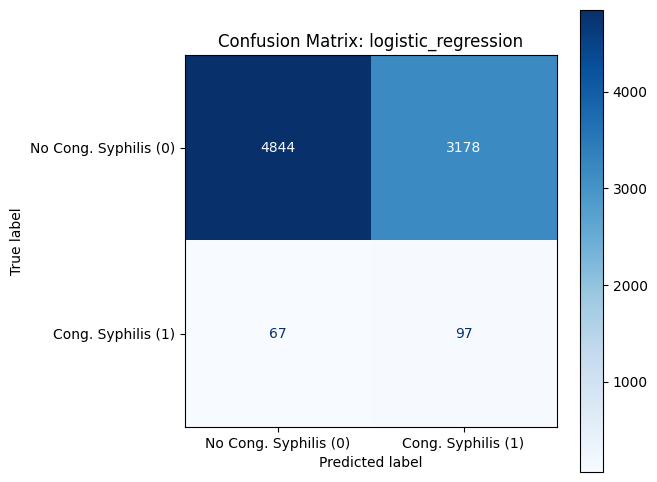


--- Plotting ROC Curve ---
ROC curve plot saved to: ../reports/figures/logistic_regression_roc_curve.png


/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


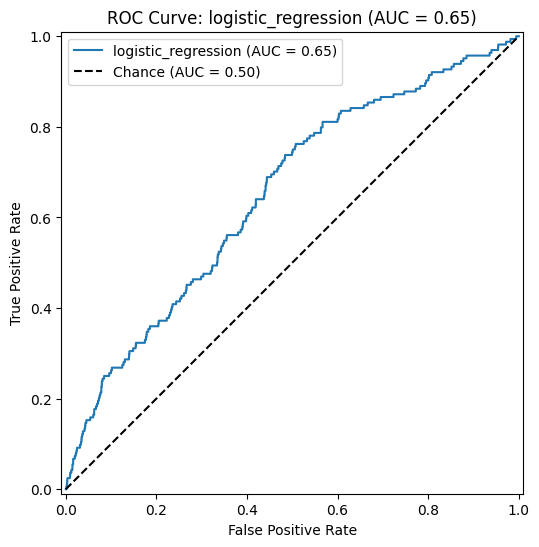


--- Plotting Precision-Recall Curve ---
Precision-Recall curve plot saved to: ../reports/figures/logistic_regression_pr_curve.png


/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


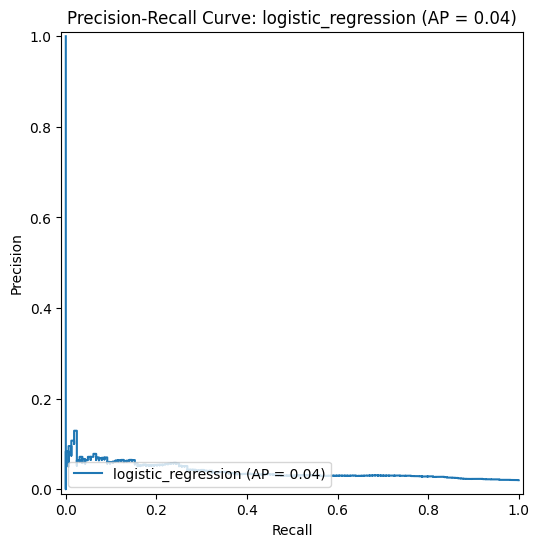

==================== Evaluation for logistic_regression completed ====================

Loading model: Random_Forest from ../models/random_forest_best.joblib

==================== Evaluating random_forest ====================

--- Generating Classification Report ---

Classification Report for random_forest:

              precision    recall  f1-score      support
0              0.979954  0.999377  0.989570  8022.000000
1              0.000000  0.000000  0.000000   164.000000
accuracy       0.979355  0.979355  0.979355     0.979355
macro avg      0.489977  0.499688  0.494785  8186.000000
weighted avg   0.960321  0.979355  0.969745  8186.000000
Classification report saved to: ../reports/tables/random_forest_classification_report.csv

--- Plotting Confusion Matrix ---
Confusion matrix plot saved to: ../reports/figures/random_forest_confusion_matrix.png


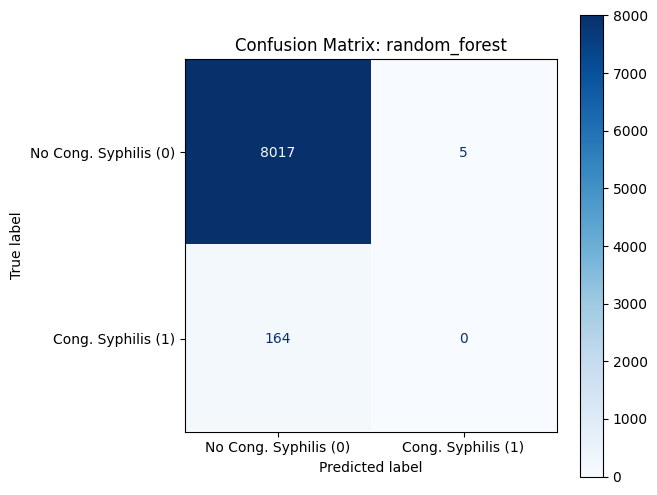


--- Plotting ROC Curve ---
ROC curve plot saved to: ../reports/figures/random_forest_roc_curve.png


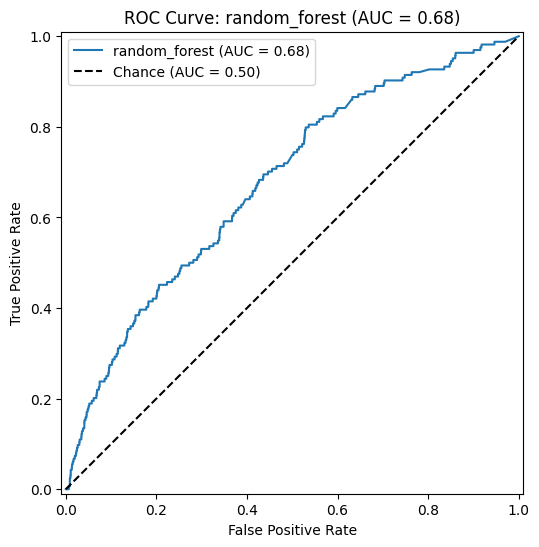


--- Plotting Precision-Recall Curve ---
Precision-Recall curve plot saved to: ../reports/figures/random_forest_pr_curve.png


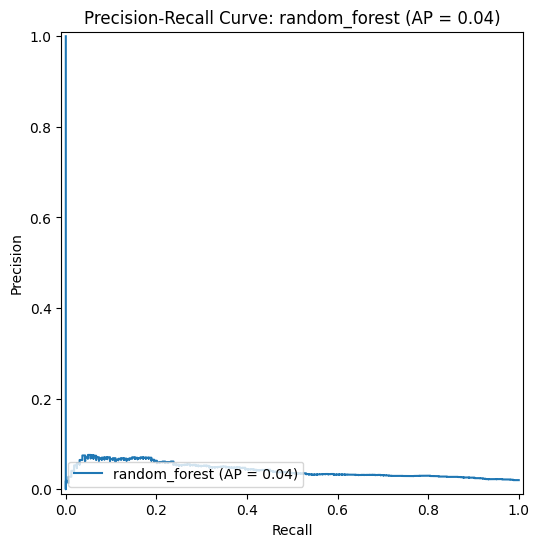

==================== Evaluation for random_forest completed ====================

Loading model: XGBoost from ../models/xgboost_best.joblib

==================== Evaluating xgboost ====================

--- Generating Classification Report ---

Classification Report for xgboost:

              precision    recall  f1-score      support
0              0.980068  0.999127  0.989506  8022.000000
1              0.125000  0.006098  0.011628   164.000000
accuracy       0.979233  0.979233  0.979233     0.979233
macro avg      0.552534  0.502612  0.500567  8186.000000
weighted avg   0.962938  0.979233  0.969915  8186.000000
Classification report saved to: ../reports/tables/xgboost_classification_report.csv

--- Plotting Confusion Matrix ---
Confusion matrix plot saved to: ../reports/figures/xgboost_confusion_matrix.png


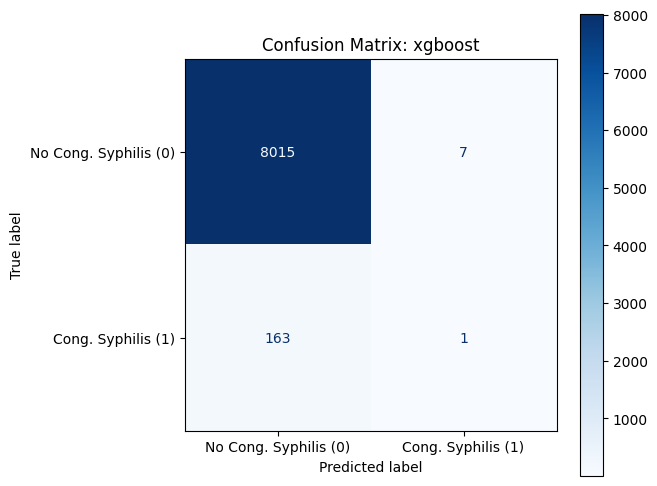


--- Plotting ROC Curve ---
ROC curve plot saved to: ../reports/figures/xgboost_roc_curve.png


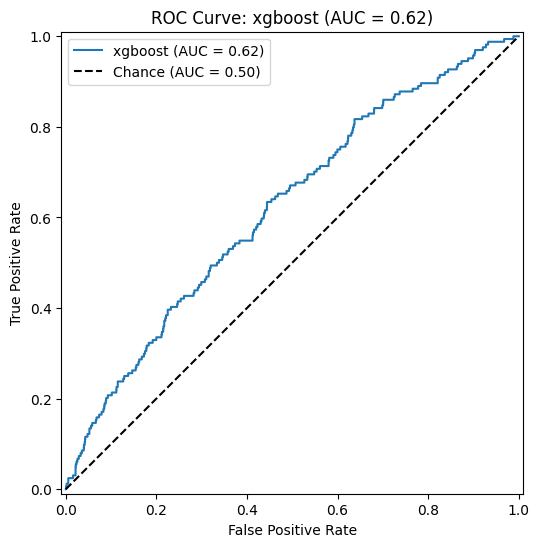


--- Plotting Precision-Recall Curve ---
Precision-Recall curve plot saved to: ../reports/figures/xgboost_pr_curve.png


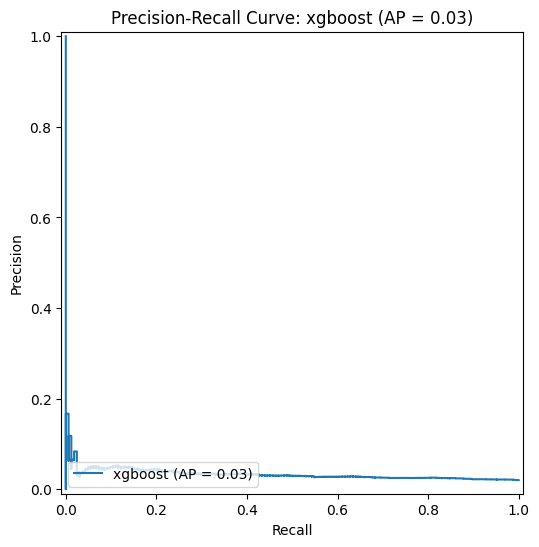

==================== Evaluation for xgboost completed ====================

--- Section 3.8 Model Evaluation: Completed ---


In [8]:
# --- 3.8 Model Evaluation ---
print("\n--- Section 3.8: Model Evaluation ---")

import joblib
import os

# Import from our evaluation module
# If you get a ModuleNotFoundError, ensure sys.path is correct
# import sys
# sys.path.append('../') # If running notebook from 'notebooks/' directory
from src.evaluation import run_model_evaluation

# Define paths for saving reports and figures
# These paths are relative to the notebook's execution directory (notebooks/)
REPORTS_BASE_DIR = "../reports/" # Goes up one level from 'notebooks/' to project root, then into 'reports/'
FIGURES_DIR = os.path.join(REPORTS_BASE_DIR, "figures")
TABLES_DIR = os.path.join(REPORTS_BASE_DIR, "tables")

# Ensure these directories exist
os.makedirs(FIGURES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

# Define model paths
MODELS_DIR = "../models/"
model_paths = {
    "Logistic_Regression": os.path.join(MODELS_DIR, "logistic_regression_best.joblib"),
    "Random_Forest": os.path.join(MODELS_DIR, "random_forest_best.joblib"),
    "XGBoost": os.path.join(MODELS_DIR, "xgboost_best.joblib")
}

# X_test and y_test should be available from Section 3.6 (Data Splitting)
# Define class labels for confusion matrix for better readability
class_labels_syphilis = ['No Cong. Syphilis (0)', 'Cong. Syphilis (1)']

# Evaluate each model
for model_name, model_path in model_paths.items():
    print(f"\nLoading model: {model_name} from {model_path}")
    try:
        loaded_model = joblib.load(model_path)
        
        # Run the full evaluation
        run_model_evaluation(
            model=loaded_model,
            X_test=X_test, # Make sure X_test is the original (non-SMOTE) test features
            y_test=y_test, # Make sure y_test is the original (non-SMOTE) test labels
            model_name_prefix=model_name.lower().replace(" ", "_"), # e.g., "logistic_regression"
            figures_dir=FIGURES_DIR,
            tables_dir=TABLES_DIR,
            class_labels=class_labels_syphilis
        )
    except FileNotFoundError:
        print(f"ERROR: Model file not found at {model_path}. Skipping evaluation for {model_name}.")
    except Exception as e:
        print(f"ERROR: Could not evaluate model {model_name}. Reason: {e}")

print("\n--- Section 3.8 Model Evaluation: Completed ---")

#3.9


--- Section 3.9: Model Evaluation with Threshold Tuning ---

--- Threshold Tuning for Logistic_Regression ---


/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Metrics vs. threshold plot saved to: ../reports/figures/logistic_regression_metrics_vs_threshold.png


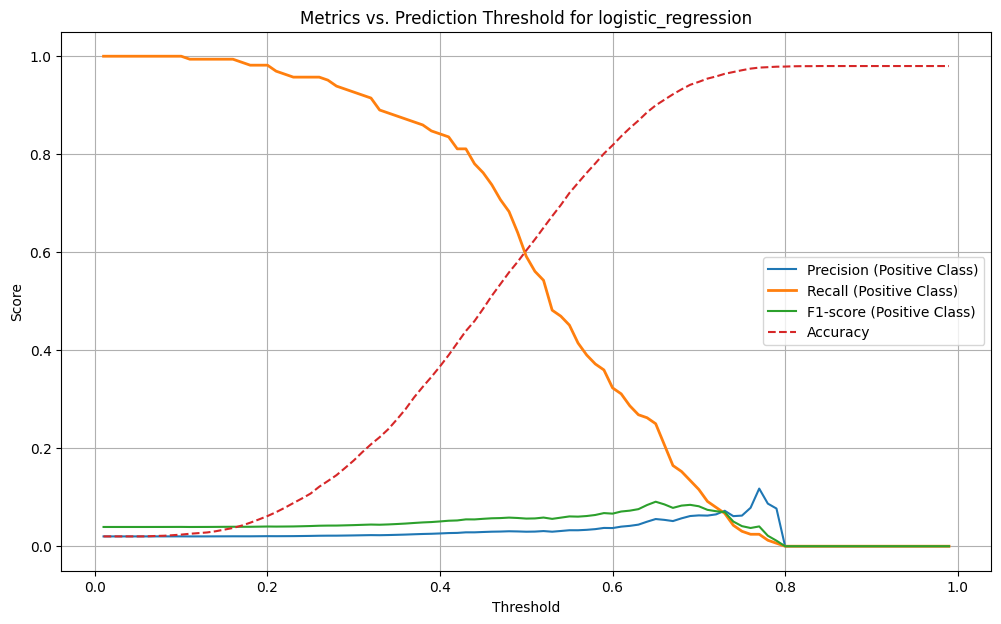


Metrics for Logistic_Regression across thresholds (first 5 rows):
   threshold  precision_pos  recall_pos    f1_pos  precision_neg  recall_neg  \
0       0.01       0.020034         1.0  0.039281            0.0         0.0   
1       0.02       0.020034         1.0  0.039281            0.0         0.0   
2       0.03       0.020034         1.0  0.039281            0.0         0.0   
3       0.04       0.020034         1.0  0.039281            0.0         0.0   
4       0.05       0.020034         1.0  0.039281            0.0         0.0   

   accuracy  
0  0.020034  
1  0.020034  
2  0.020034  
3  0.020034  
4  0.020034  
Threshold tuning completed for Logistic_Regression.

--- Threshold Tuning for Random_Forest ---
Metrics vs. threshold plot saved to: ../reports/figures/random_forest_metrics_vs_threshold.png


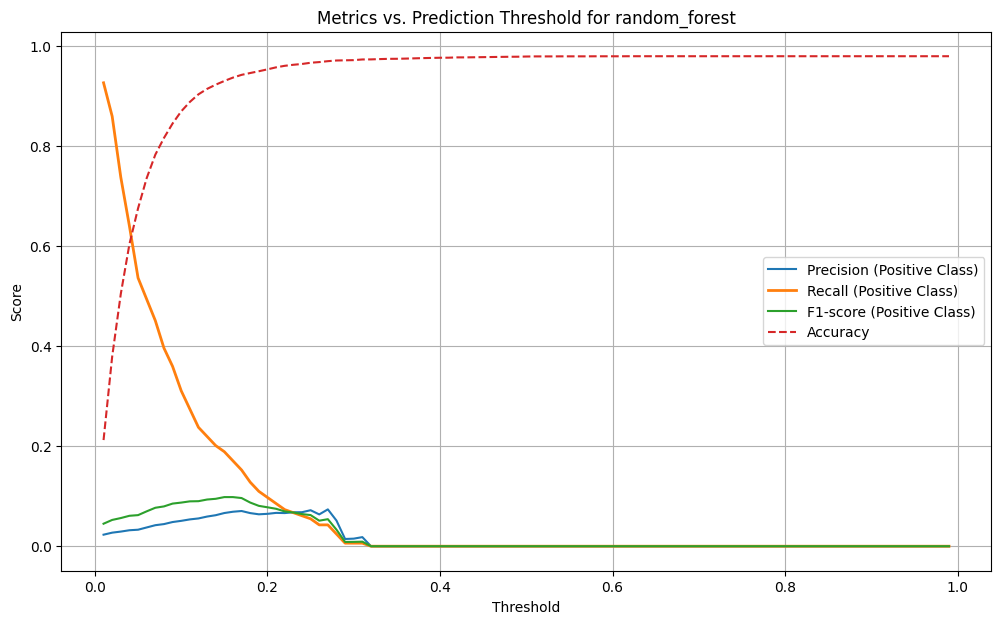


Metrics for Random_Forest across thresholds (first 5 rows):
   threshold  precision_pos  recall_pos    f1_pos  precision_neg  recall_neg  \
0       0.01       0.023072    0.926829  0.045024       0.992491    0.197706   
1       0.02       0.027121    0.859756  0.052583       0.992300    0.369484   
2       0.03       0.029284    0.737805  0.056331       0.989393    0.500000   
3       0.04       0.031954    0.640244  0.060870       0.987959    0.603465   
4       0.05       0.033008    0.536585  0.062191       0.986232    0.678634   

   accuracy  
0  0.212314  
1  0.379306  
2  0.504764  
3  0.604202  
4  0.675788  
Threshold tuning completed for Random_Forest.

--- Threshold Tuning for XGBoost ---
Metrics vs. threshold plot saved to: ../reports/figures/xgboost_metrics_vs_threshold.png


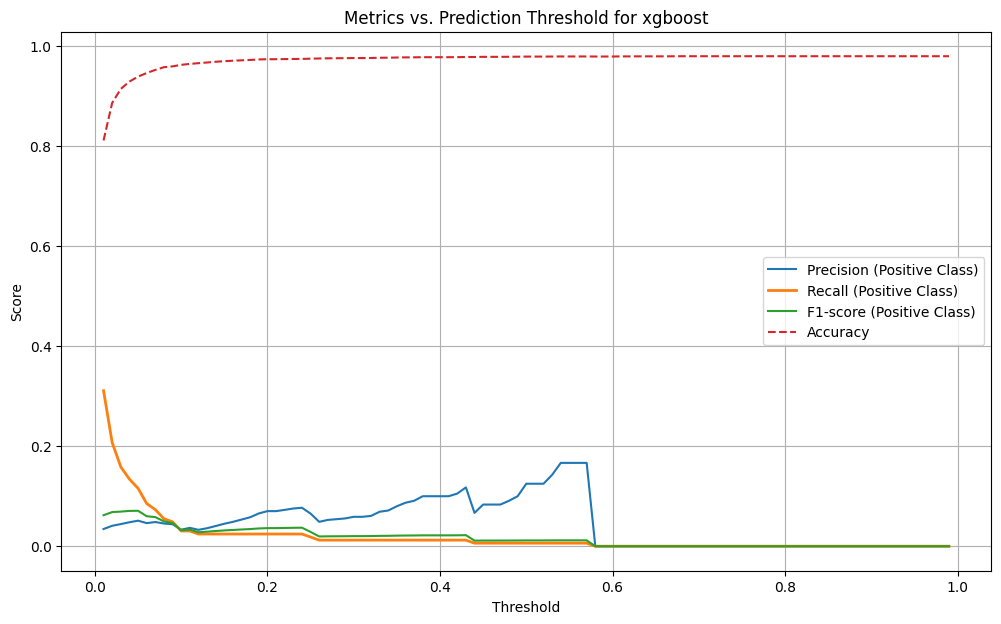


Metrics for XGBoost across thresholds (first 5 rows):
   threshold  precision_pos  recall_pos    f1_pos  precision_neg  recall_neg  \
0       0.01       0.034436    0.310976  0.062006       0.983147    0.821740   
1       0.02       0.040865    0.207317  0.068273       0.982323    0.900524   
2       0.03       0.044293    0.158537  0.069241       0.981840    0.930067   
3       0.04       0.047930    0.134146  0.070626       0.981623    0.945525   
4       0.05       0.051075    0.115854  0.070896       0.981444    0.955996   

   accuracy  
0  0.811507  
1  0.886636  
2  0.914610  
3  0.929269  
4  0.939164  
Threshold tuning completed for XGBoost.

--- Section 3.9 Model Evaluation with Threshold Tuning: Completed ---

Please inspect the generated '..._metrics_vs_threshold.png' plots in your 'reports/figures/' directory.
The 'threshold_tuning_metrics' dictionary in your notebook now holds DataFrames with detailed metrics for each model.


In [9]:
# --- 3.9 Model Evaluation with Threshold Tuning ---
print("\n--- Section 3.9: Model Evaluation with Threshold Tuning ---")

import joblib
import os
import pandas as pd # Ensure pandas is imported
import numpy as np # Ensure numpy is imported
import matplotlib.pyplot as plt # Ensure matplotlib.pyplot is imported

# If you've run previous cells in this session, X_test, y_test, model_paths, 
# FIGURES_DIR, TABLES_DIR, and class_labels_syphilis should be available.

# To ensure the notebook picks up the changes in src.evaluation.py,
# you might need to reload the module or restart the kernel if you haven't already.
# For reloading (run this once if you suspect the old version is cached):
# import importlib
# from src import evaluation
# importlib.reload(evaluation)

from src.evaluation import evaluate_with_threshold_tuning, run_model_evaluation # Make sure both are imported

# Dictionary to store metrics DataFrames from threshold tuning
threshold_tuning_metrics = {}

# Assuming model_paths is defined from the previous cell (Section 3.8)
# model_paths = {
#     "Logistic_Regression": os.path.join(MODELS_DIR, "logistic_regression_best.joblib"),
#     "Random_Forest": os.path.join(MODELS_DIR, "random_forest_best.joblib"),
#     "XGBoost": os.path.join(MODELS_DIR, "xgboost_best.joblib")
# }
# And X_test, y_test are also available from data splitting step.
# FIGURES_DIR and TABLES_DIR should also be defined.

for model_name, model_path in model_paths.items():
    print(f"\n--- Threshold Tuning for {model_name} ---")
    try:
        loaded_model = joblib.load(model_path)

        if hasattr(loaded_model, "predict_proba"):
            metrics_df = evaluate_with_threshold_tuning(
                model=loaded_model,
                X_test=X_test, # Original test features
                y_test=y_test, # Original test labels
                model_name_prefix=model_name.lower().replace(" ", "_"),
                figures_dir=FIGURES_DIR,
                tables_dir=TABLES_DIR, # Passed for consistency, not directly used for table saving by this func
                positive_class_label=1 # Our positive class is 1 (Cong. Syphilis)
            )
            if metrics_df is not None:
                threshold_tuning_metrics[model_name] = metrics_df
                print(f"\nMetrics for {model_name} across thresholds (first 5 rows):")
                print(metrics_df.head())
                # You can further inspect metrics_df[model_name] for detailed values
            print(f"Threshold tuning completed for {model_name}.")
        else:
            print(f"Model {model_name} does not support predict_proba. Skipping threshold tuning.")
            
    except FileNotFoundError:
        print(f"ERROR: Model file not found at {model_path}. Skipping {model_name}.")
    except Exception as e:
        print(f"ERROR: Could not perform threshold tuning for {model_name}. Reason: {e}")

print("\n--- Section 3.9 Model Evaluation with Threshold Tuning: Completed ---")
print("\nPlease inspect the generated '..._metrics_vs_threshold.png' plots in your 'reports/figures/' directory.")
print("The 'threshold_tuning_metrics' dictionary in your notebook now holds DataFrames with detailed metrics for each model.")

#3.10


--- Section 3.10: Re-evaluation with Chosen Thresholds ---

--- Re-evaluating Logistic_Regression with threshold: 0.6 ---

==================== Evaluating logistic_regression_thresh_0p60 ====================
Evaluating with custom threshold: 0.6

--- Generating Classification Report ---

Classification Report for logistic_regression_thresh_0p60:

              precision    recall  f1-score      support
0              0.983570  0.828347  0.899310  8022.000000
1              0.037063  0.323171  0.066499   164.000000
accuracy       0.818226  0.818226  0.818226     0.818226
macro avg      0.510317  0.575759  0.482905  8186.000000
weighted avg   0.964608  0.818226  0.882625  8186.000000
Classification report saved to: ../reports/tables/logistic_regression_thresh_0p60_classification_report.csv

--- Plotting Confusion Matrix ---
Confusion matrix plot saved to: ../reports/figures/logistic_regression_thresh_0p60_confusion_matrix.png


/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


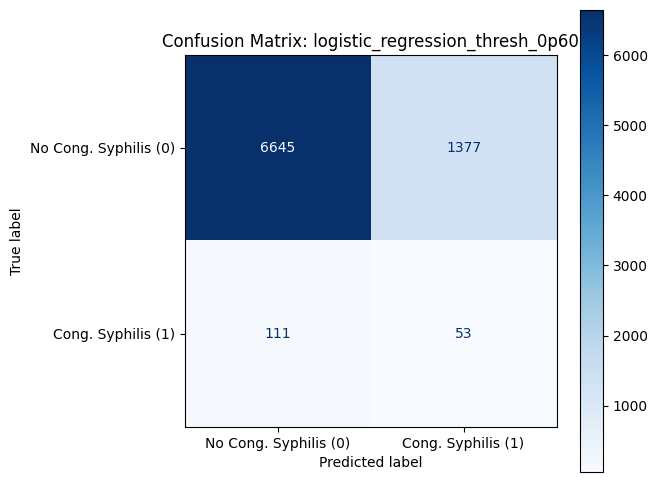


--- Plotting ROC Curve ---
ROC curve plot saved to: ../reports/figures/logistic_regression_thresh_0p60_roc_curve.png


/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


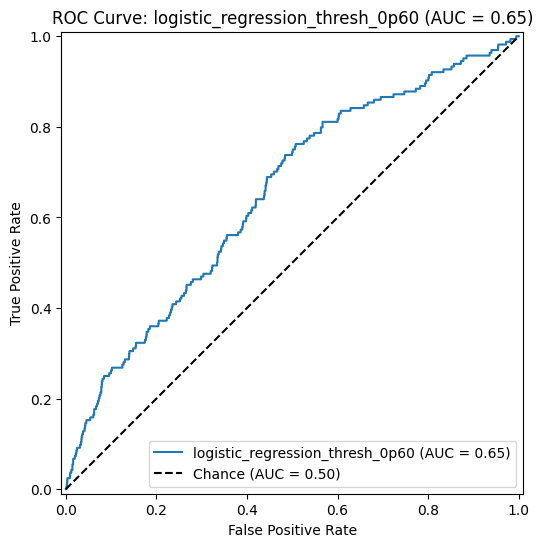


--- Plotting Precision-Recall Curve ---
Precision-Recall curve plot saved to: ../reports/figures/logistic_regression_thresh_0p60_pr_curve.png


/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/theomoura/Documents/coding/university/machineLearning/env/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


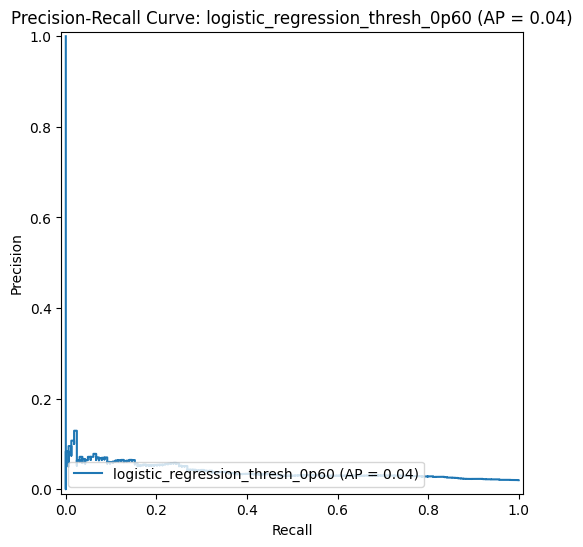

==================== Evaluation for logistic_regression_thresh_0p60 completed ====================

--- Re-evaluating Random_Forest with threshold: 0.02 ---

==================== Evaluating random_forest_thresh_0p02 ====================
Evaluating with custom threshold: 0.02

--- Generating Classification Report ---

Classification Report for random_forest_thresh_0p02:

              precision    recall  f1-score      support
0              0.992300  0.369484  0.538469  8022.000000
1              0.027121  0.859756  0.052583   164.000000
accuracy       0.379306  0.379306  0.379306     0.379306
macro avg      0.509710  0.614620  0.295526  8186.000000
weighted avg   0.972963  0.379306  0.528734  8186.000000
Classification report saved to: ../reports/tables/random_forest_thresh_0p02_classification_report.csv

--- Plotting Confusion Matrix ---
Confusion matrix plot saved to: ../reports/figures/random_forest_thresh_0p02_confusion_matrix.png


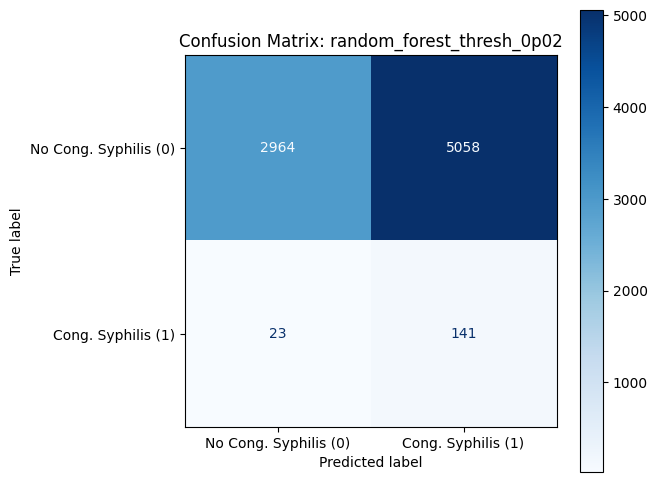


--- Plotting ROC Curve ---
ROC curve plot saved to: ../reports/figures/random_forest_thresh_0p02_roc_curve.png


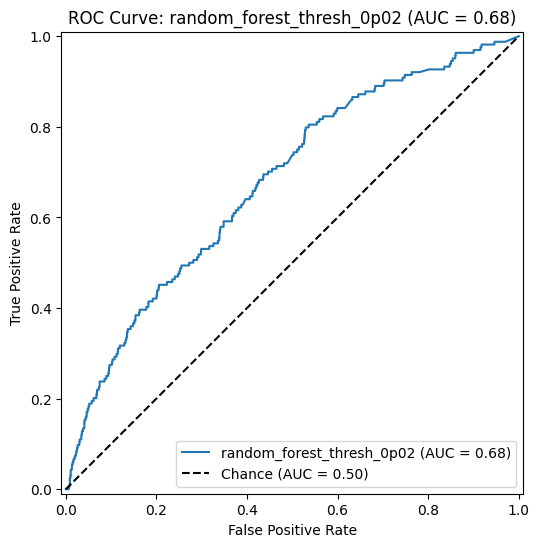


--- Plotting Precision-Recall Curve ---
Precision-Recall curve plot saved to: ../reports/figures/random_forest_thresh_0p02_pr_curve.png


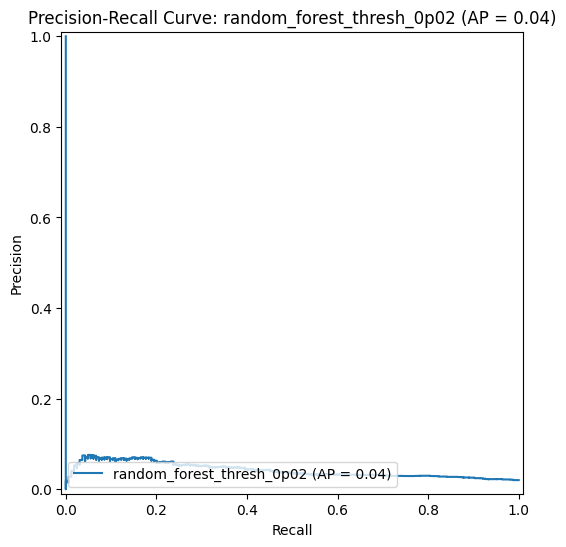

==================== Evaluation for random_forest_thresh_0p02 completed ====================

--- Re-evaluating XGBoost with threshold: 0.01 ---

==================== Evaluating xgboost_thresh_0p01 ====================
Evaluating with custom threshold: 0.01

--- Generating Classification Report ---

Classification Report for xgboost_thresh_0p01:

              precision    recall  f1-score      support
0              0.983147  0.821740  0.895226  8022.000000
1              0.034436  0.310976  0.062006   164.000000
accuracy       0.811507  0.811507  0.811507     0.811507
macro avg      0.508792  0.566358  0.478616  8186.000000
weighted avg   0.964140  0.811507  0.878534  8186.000000
Classification report saved to: ../reports/tables/xgboost_thresh_0p01_classification_report.csv

--- Plotting Confusion Matrix ---
Confusion matrix plot saved to: ../reports/figures/xgboost_thresh_0p01_confusion_matrix.png


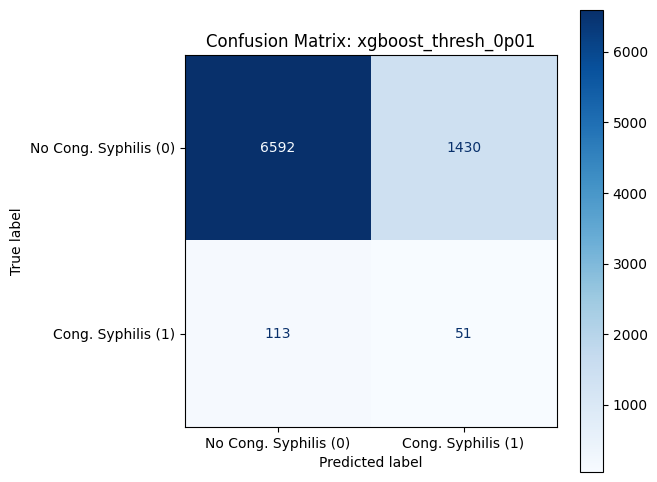


--- Plotting ROC Curve ---
ROC curve plot saved to: ../reports/figures/xgboost_thresh_0p01_roc_curve.png


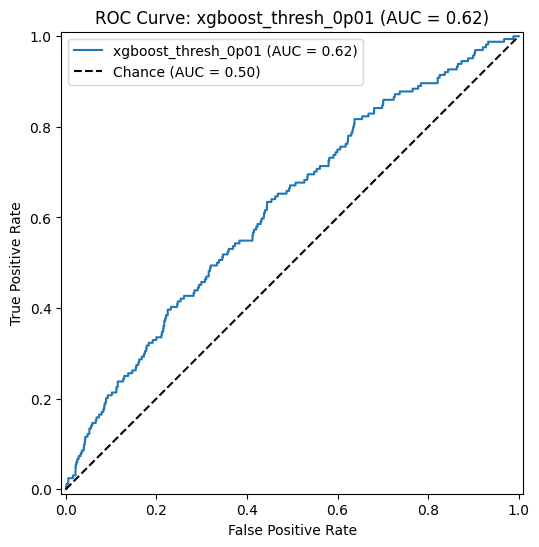


--- Plotting Precision-Recall Curve ---
Precision-Recall curve plot saved to: ../reports/figures/xgboost_thresh_0p01_pr_curve.png


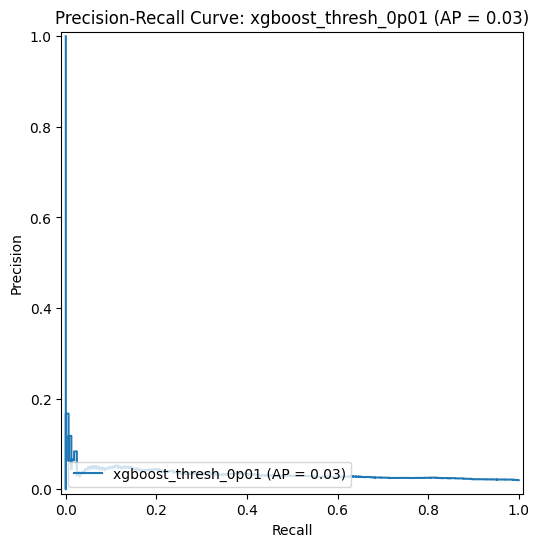

==================== Evaluation for xgboost_thresh_0p01 completed ====================

--- Section 3.10 Re-evaluation with Chosen Thresholds: Completed ---
Please check 'reports/tables/' and 'reports/figures/' for new evaluation files prefixed with '_thresh_...'


In [10]:
# --- 3.10 Re-evaluation with Chosen Thresholds ---
print("\n--- Section 3.10: Re-evaluation with Chosen Thresholds ---")

import joblib
import os

# Ensure X_test, y_test, model_paths, FIGURES_DIR, TABLES_DIR, class_labels_syphilis 
# are available from previous cells.

# If you restarted the kernel and didn't reload evaluation, or if you want to be sure:
# import importlib
# from src import evaluation
# importlib.reload(evaluation)
from src.evaluation import run_model_evaluation # Ensure this is imported

# Define the chosen thresholds for each model
chosen_thresholds = {
    "Logistic_Regression": 0.60,
    "Random_Forest": 0.02,
    "XGBoost": 0.01 
    # For XGBoost, 0.01 is chosen to see if we can boost recall, 
    # acknowledging its overall weaker performance in threshold tuning.
}

# Re-evaluate each model with its chosen threshold
for model_name, model_path in model_paths.items():
    selected_threshold = chosen_thresholds.get(model_name)
    
    if selected_threshold is None:
        print(f"\nNo specific threshold chosen for {model_name}. Skipping re-evaluation with custom threshold.")
        continue

    print(f"\n--- Re-evaluating {model_name} with threshold: {selected_threshold} ---")
    
    try:
        loaded_model = joblib.load(model_path)
        
        # Create a new prefix for filenames to indicate thresholded evaluation
        # e.g., "logistic_regression_thresh_0.60"
        file_prefix_with_threshold = f"{model_name.lower().replace(' ', '_')}_thresh_{selected_threshold:.2f}".replace('.', 'p')

        run_model_evaluation(
            model=loaded_model,
            X_test=X_test,
            y_test=y_test,
            model_name_prefix=file_prefix_with_threshold, # Use new prefix
            figures_dir=FIGURES_DIR,
            tables_dir=TABLES_DIR,
            class_labels=class_labels_syphilis,
            threshold=selected_threshold # Pass the chosen threshold
        )
        
    except FileNotFoundError:
        print(f"ERROR: Model file not found at {model_path}. Skipping {model_name}.")
    except Exception as e:
        print(f"ERROR: Could not re-evaluate model {model_name} with threshold. Reason: {e}")

print("\n--- Section 3.10 Re-evaluation with Chosen Thresholds: Completed ---")
print("Please check 'reports/tables/' and 'reports/figures/' for new evaluation files prefixed with '_thresh_...'")